## Лабораторная работа "Введение в ML"

В этой лабораторной вы:

- познакомитесь с базовыми библиотеками для работы с табличными данными — `numpy` и `pandas`
- поближе посмотрите на простейшие задачи машинного обучения: классификацию и регрессию
- попробуете несколько метрик и поймёте, почему выбор метрики это важно
- обучите несколько простых моделей
- увидите связь между сложностью модели и переобучением
- убедитесь, что без данных всё тлен

Загрузка самых базовых библиотек:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### [NumPy](https://numpy.org/doc/stable/user/index.html)

С 1995 numeric, с 2006 NumPy — «Numerical Python extensions» или просто «NumPy»

Возможности библиотеки NumPy:
* работать с многомерными массивами (таблицами)
* быстро вычислять математические функций на многомерных массивах

Ядро пакета NumPy — объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences:
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Скорость** NumPy достигается с помощью:
* реализации на C
* векторизации и броадкастинга (broadcasting). Например, произведение массивов совместимых форм.

Теперь давайте разберёмся подробнее и сделаем что-нибудь приятное и полезное в `numpy`!

### Индексация

В NumPy работает привычная индексация Python, ура! Включая использование отрицательных индексов и срезов (slices)

<div class="alert alert-info">
<b>Замечание 1:</b> Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками,
т.е. вместо <b>matrix[i][j]</b> нужно использовать <b>matrix[i, j]</b>. Первое тоже работает, но сначала выдаёт строку i, потом элемент j в ней.
</div>

<div class="alert alert-danger">
<b>Замечание 2:</b> Срезы в NumPy создают view, а не копии, как в случае срезов встроенных последовательностей Python (string, tuple and list).
</div>

In [9]:
ones_matrix = np.ones((5, 5))
print (ones_matrix)
ones_submatrix_view = ones_matrix[::2,::2] # creates a view, not copy
ones_matrix[::2,::2] = np.zeros((3, 3))
print (ones_submatrix_view)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### Ссылка на Яндекс.Контест

Решения и ответы в задачах, расположенных ниже, загружайте в контест на автоматическую проверку:
https://new.contest.yandex.ru/60376/start


**1.** Реализуйте функцию, принимающую на вход два одномерных массива `first_array` и `second_array` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

Вероятно первое, что приходит вам на ум, это конкатенация и транспонирование:

In [10]:
# def construct_matrix(first_array: np.ndarray = None, second_array: np.ndarray = None) ->np.ndarray:
#     """
#     Construct matrix from pair of arrays
#     :param first_array: first array
#     :param second_array: second array
#     :return: constructed matrix
#     """
#     shape_first_array = first_array.shape
#     shape_second_array = second_array.shape
#     if shape_first_array == shape_second_array:
#         return np.hstack([first_array.reshape([shape_first_array[0],1]), second_array.reshape([shape_second_array[0],1])])
#     # return np.hstack([first_array.reshape([4,1]), second_array.reshape([4,1])])

import numpy as np
def construct_matrix(first_array: np.ndarray = None, second_array: np.ndarray = None) ->np.ndarray:
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    return np.column_stack((first_array, second_array))

In [11]:
# construct_matrix(np.array([1,2,3,4,5]),np.array(['a','b','c','d']))
construct_matrix(np.array([]),np.array([]))
# print (type(construct_matrix(np.array([1,2,3,4]),np.array(['a','b','c','d']))))
# print (np.array([1,2,3,4]).shape)
# print (np.array([1,2,3,4]).shape[0])

array([], shape=(0, 2), dtype=float64)

(в скобках заметим, что конкатенировать можно vertically, horizontally, depth wise методами vstack, hstack, dstack по трём осям (0, 1 и 2, соотвественно), либо в общем случае `np.concatenate` — поиграйтесь ниже с прекрасным примером четырёхмерной точки, чтобы точно всё для себя понять)

In [12]:
p = np.arange(1).reshape([1, 1, 1, 1])
print (p)

[[[[0]]]]


In [13]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)


In [14]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

Но, поскольку операция транспонирования [делает массив non-contiguous](https://numpy.org/doc/stable/user/basics.copies.html#other-operations), мы в этой задаче **запретим** ей пользоваться и порекомедуем воспользоваться, например, методом [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [15]:
def most_frequent(nums: list[int] = None) -> int:
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    unique_value = tuple(set (nums))
    count_frequence = [0] * len(unique_value)
    for new_value in nums:
        count_frequence[unique_value.index(new_value)] += 1
    return unique_value[count_frequence.index(max(count_frequence))]

In [16]:
most_frequent([3, 3, 4, 5, 6, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 8, 9, 11])

3

### Переходим к работе с данными

Прежде всего, загрузим данные и сделаем из них красивые pandas-таблички. Они взяты из параллели RecSys соревнования https://yandex.ru/cup/ml/. Но мы будем иметь дело не со всеми данными, а только с их частью. Данные у нас будут про заведения общественного питания (больше бюрократический терминологии!)

Файлы с данными можно найти [здесь](https://disk.yandex.ru/d/YWvCNRQMb7QSQA).

Задачей будет **предсказание среднего чека** (average_bill) по некоторым другим свойствам заведения.

In [17]:

import os
print(os.getcwd())


d:\Study\Yandex\ML_Handbook


In [18]:
base = 'home/avalur/autohw/'

In [19]:
data = pd.read_csv(base + 'organisations.csv')
features = pd.read_csv(base + 'features.csv')
rubrics = pd.read_csv(base + 'rubrics.csv')

# data = pd.read_csv('home/avalur/autohw/organisations.csv')

В основном мы будем работать с табличкой `data`; остальное вам может пригодиться, если вы захотите знать, какое содержание стоит за кодами признаков.

## Изучение данных

Посмотрите на данные. В этом вам поможет метод ``head`` pandas-таблички.

In [20]:
# <Your code here>
data.head(10)

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
5,4997872545011433005,msk,500.0,4.541667,31495,273469383 20422 20282 11629 3501745827 11617 1...
6,9129259535187484854,msk,500.0,4.015267,30776 30771,273469383 20424 20282 11617 11177 10462 20422 ...
7,8361679950520236967,msk,500.0,4.446154,30776 30777,1415 1018 1524 11617 11867 11629 11177 11704 1...
8,11913692756639492916,spb,500.0,3.600000,30777,3501744275 3501618484 20424 11741 11617 12048 ...
9,17739408339297875651,spb,500.0,4.276219,30771,10462 11177 11617 11629 1018 11704 3501744275 ...


Полезно посмотреть внимательнее на то, с какими признаками нам предстоит работать.

* **org_id** вам не понадобится;
* **city** - город, в котором находится заведение (``msk`` или ``spb``);
* **average_bill** - средний чек в заведении - он будет нашим таргетом;
* **rating** - рейтинг заведения;
* **rubrics_id** - тип заведения (или несколько типов). Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``rubrics``
* **features_id** - набор неких фичей заведения. Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``features``

Обратите внимание, что **rubrics_id** и **features_id** - это не списки, а разделённые пробелами строки. Когда вам захочется работать с отдельными фичами из мешка фичей для данного заведения, вам придётся всё-таки превратить их в списки (здесь поможет метод `split` для строк).

Чтобы быстро восстанавливать по рубрикам и фичам их нормальные названия, сделайте словари вида ``код_фичи:название_фичи``

In [21]:
# <Your code here>
# features.head()
features_dict = {}
for i in range(len(features)):
    features_dict[features.iloc[i, 0].tolist()] = features.iloc[i, 1]

# features.head()
rubric_dict = {}
for i in range(len(rubrics)):
    rubric_dict[rubrics.iloc[i, 0].tolist()] = rubrics.iloc[i, 1]

In [22]:
print(features_dict)
print(rubric_dict)

{1: 'prepress_and_post_printing_processing', 40: 'products', 54: 'printing_method', 77: 'fuel', 79: 'shop', 82: 'last_minute_deals_only', 104: 'tour_type', 110: 'audio_guide', 111: 'cargo_transportation', 113: 'manufacturing', 114: 'installation', 115: 'repairs', 116: 'production', 117: 'sale', 133: 'music_genre', 135: 'electroniccigarette', 137: 'variety_food', 140: 'room_disabled', 175: 'arts', 246: 'karaoke', 249: 'street_theatre', 253: 'performance', 256: 'vip_zone', 270: 'money_transfers', 275: 'loans_private_individuals', 282: 'sober_driver', 288: 'accepted_credit_cards', 305: 'refrigerator', 308: 'minibar', 312: 'room_number', 328: 'speciality', 337: 'type_of_rooms', 344: 'building_repair', 349: 'hospital_profile', 354: 'type_parking', 372: 'services_corporate_clients', 379: 'currency_exchange', 392: 'debit_cards', 402: 'improving_driver_qualifications', 405: 'female_instructor', 409: 'medical_board', 425: 'training_machines', 427: 'target_audience', 433: 'business_lending', 444

Посмотрим, какими бывают типы заведений:

Мы что-то поняли про признаки, которыми нам предстоит пользоваться. Теперь время посмотреть на таргет. Вооружившись функциями ``hist`` и ``scatter`` из библиотеки ``matplotlib``, а также методом ``isna`` для pandas-таблиц разберитесь, какие значения принимают таргеты, есть ли там там выбросы, пропуски или ещё какие-то проблемы.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>Среди таргетов довольно много пропусков;</li>
      <li>Все таргеты - это числа, кратные 500;</li>
      <li>Есть какие-то адские значения, превышающие 100 000 (видимо, выбросы);</li>
      <li>В целом, число ресторанов с данным средним чеком быстро падает с ростом среднего чека. Для средних чеков, больших 2500, заведений уже совсем мало. Примерно у 2/3 заведений средний чек 500.</li>
    </ol>
</details>

In [23]:
data_msk = data.where(data['city'] == 'msk')
data_msk = data_msk[['city', 'average_bill']].dropna()
print(data_msk)
data_spb = data.where(data['city'] == 'spb')
data_spb = data_spb[['city', 'average_bill']].dropna()
print(data_spb)

data_for_view = pd.concat([data_msk, data_spb])
print(data_for_view)
print(data.shape)

      city  average_bill
0      msk        1500.0
1      msk         500.0
2      msk         500.0
3      msk         500.0
4      msk         500.0
...    ...           ...
68326  msk        1000.0
68329  msk        1500.0
68330  msk        1500.0
68331  msk        1500.0
68332  msk        2500.0

[21412 rows x 2 columns]
      city  average_bill
8      spb         500.0
9      spb         500.0
10     spb         500.0
11     spb         500.0
12     spb         500.0
...    ...           ...
68288  spb        1500.0
68316  spb         500.0
68317  spb         500.0
68327  spb        1000.0
68328  spb        1000.0

[11366 rows x 2 columns]
      city  average_bill
0      msk        1500.0
1      msk         500.0
2      msk         500.0
3      msk         500.0
4      msk         500.0
...    ...           ...
68288  spb        1500.0
68316  spb         500.0
68317  spb         500.0
68327  spb        1000.0
68328  spb        1000.0

[32778 rows x 2 columns]
(68339, 6)


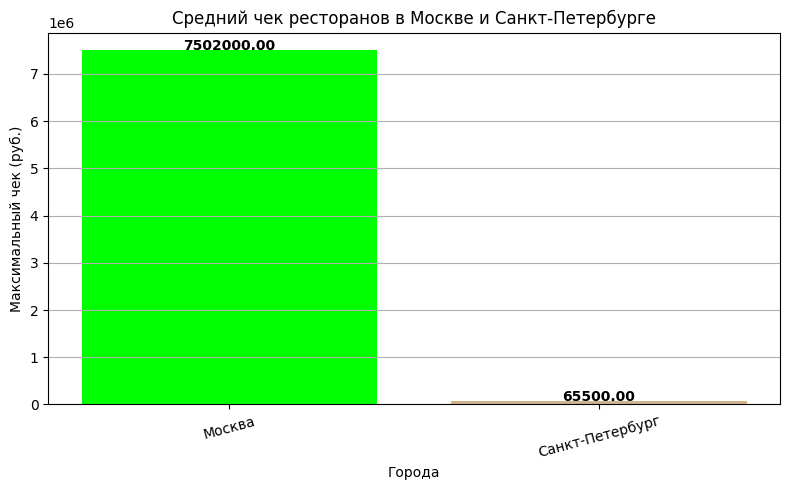

In [24]:
# Выбор данных только для нужных городов
df_msk = data[data['city'] == 'msk']
df_spb = data[data['city'] == 'spb']

# Рассчитываем средние чеки
average_msk = df_msk['average_bill'].max()
average_spb = df_spb['average_bill'].max()

# Подготавливаем данные для гистограммы
cities = ['Москва', 'Санкт-Петербург']
averages = [average_msk, average_spb]

# Создание гистограммы
plt.figure(figsize=(8, 5))
plt.bar(cities, averages, color=['lime', 'tan'])
plt.title('Средний чек ресторанов в Москве и Санкт-Петербурге')
plt.ylabel('Максимальный чек (руб.)')
plt.xlabel('Города')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Показать значения на столбиках
for i, v in enumerate(averages):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', fontweight='bold')

# Отображаем график
plt.tight_layout()
plt.show()

**Базовая очистка данных**

Раз есть треш, давайте чистить данные.

С пропусками можно бороться по-разному (даже и с пропусками в таргете), но пока мы сделаем самую простую вещь: дропнем все заведения, для которых мы не знаем средний чек.

Уберите из них все заведения, у которых средний чек неизвестен или превышает 2500. Пока есть опасение, что их слишком мало, чтобы мы смогли обучить на них что-нибудь.

**3. Введите в Контест количество заведений, которое у вас получилось после очистки**.

Дальше мы будем работать с очищенными данными.

In [25]:
# <Your code here>
# data_for_view.where(data_for_view["average_bill"] == 1500)
data_for_view.dropna(inplace=True)
data_for_view = data_for_view[data_for_view['average_bill'] <= 2500]
print (data_for_view)

      city  average_bill
0      msk        1500.0
1      msk         500.0
2      msk         500.0
3      msk         500.0
4      msk         500.0
...    ...           ...
68288  spb        1500.0
68316  spb         500.0
68317  spb         500.0
68327  spb        1000.0
68328  spb        1000.0

[32136 rows x 2 columns]


**4. Посчитайте и введите в Контест разность между средними арифметическими average_bill в кафе Москвы и Санкт-Петербурга. Округлите ответ до целого.**

&nbsp;

<details>
  <summary>Небольшая подсказка</summary>
  Примените часто используемый метод groupby.
</details>

In [26]:
filtered_data = data[data['rubrics_id'].apply(lambda x: '30774' in x.split())]
filtered_data = filtered_data[filtered_data['average_bill'] <= 2500]
average_msk = filtered_data[filtered_data['city'] == 'msk']['average_bill'].mean()
average_spb = filtered_data[filtered_data['city'] == 'spb']['average_bill'].mean()
filtered_data.dropna(inplace=True)

average_bill_by_city = filtered_data.groupby('city')['average_bill'].mean()
print (f"Average check in MSK = {average_msk}")
print (f"Average check in SPB = {average_spb}")
print (average_msk - average_spb)
# print(filtered_data)
print(average_bill_by_city)
print(round(average_bill_by_city[0]), round(average_bill_by_city[1]))
print(f"diff = {average_bill_by_city[0] - average_bill_by_city[1]}")

Average check in MSK = 781.0807941395052
Average check in SPB = 638.6771069441583
142.40368719534695
city
msk    767.993971
spb    628.064746
Name: average_bill, dtype: float64
768 628
diff = 139.92922411777647


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\2295126197.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(average_bill_by_city[0]), round(average_bill_by_city[1]))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\2295126197.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"diff = {average_bill_by_city[0] - average_bill_by_city[1]}")


In [27]:
# <Your code here>
average_msk = data_for_view[data_for_view["city"] == "msk"][data_for_view.columns[1]].mean()
print(average_msk)
print(round(average_msk))
average_spb = data_for_view[data_for_view["city"] == "spb"][data_for_view.columns[1]].mean()
print(average_spb)
print(round(average_spb))

print (average_msk-average_spb)
print (round(average_msk)-round(average_spb))
print (round(average_msk-average_spb))

792.8872295615547
793
676.449662041978
676
116.43756751957676
117
116


Давайте ещё немного поизучаем данные. Ответьте на вопросы:

1. Есть ли разница между средними чеками в Москве и Санкт-Петербурге?
2. Коррелирует ли средний чек с рейтингом?
3. Есть ли разница в среднем чеке между ресторанами и пабами (см. соответствующие типы из ``rubrics``)?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>В целом, да. Вы могли бы сравнить средние (в Москве больше) или медианы (они равны, потому что уж больно много где средний чек 500). Этого, конечно, мало для того, чтобы сделать вывод. Нужно проверять какие-то статические критерии, которые изучаются в курсе по статистике. Не будем останавливаться на этом подробно. Поскольку данные совсем не нормальные, никакой t-тест не сработает; мы бы предложили использовать критерий Манна-Уитни (см. википедию и функцию mannwhitneyu из библиотеки scipy.stats).</li>
      <li>Какая-то корреляция между ними есть но уж больно неубедительная (рекомендуем построим на одном графике boxplot рейтинга по каждому значению среднего чека для визуализации). Конечно, дна становится меньше с ростом среднего чека, но, видимо, в предсказании это особо не используешь;</li>
      <li>Несомненно, в ресторанах средний чек выше. Это и невооружённым глазом видно, и с помощью критерия Манна-Уитни можно проверить.</li>
    </ol>
</details>

## Формулируем задачу

Прежде, чем решать задачу, её надо сформулировать.

**Вопрос первый**: это классификация или регрессия? Подумайте над этим.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    Ответ не столь однозначен, как хотелось бы. С одной стороны, таргет принимает всего четыре значения, и потому это может быть классификацией с 4 классами. С другой стороны, таргеты - это не абстрактные "треугольник", "круг", "квадрат", а вещественные числа, и когда мы вместо 500 предсказываем 2500, это явно хуже, чем вместо 1500 предсказать 2000. В целом, задачу можно решать и так, и так; мы будем смотреть на метрики обеих задач.
</details>

**Вопрос второй**: какие метрики мы будем использовать для оценки качества решения? Какие метрики вы предложили бы для этой задачи как для задачи классификации? А для этой задачи, как для задачи регрессии?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Начнём с классификации. Метрика accuracy не очень хороша из-за несбалансированности классов. Действительно, классификатор, который всегда говорит 500, будет иметь accuracy примерно 0.66, хотя это никак не отражает практическую ценность модели. Как мы увидим, самая большая проблема будет заключаться в том, чтобы научиться выделять заведения с большими чеками, а их меньше всего и в accuracy они вносят самый маленький вклад. Есть разные способы с этим бороться, один -- использовать sklearn.metrics.balanced_accuracy_score. Его идея, грубо говоря, в том, чтобы по каждому классу найти, какая доля объектов этого класса правильно классифицирована, а потом эти доли усреднить. Тогда у бессмысленного классификатора, который всем ставит 500, будет скор 1/5 (ведь классов 5), а чтобы получить прежние 2/3, нужно будет научиться в каждом классе правильно ставить хотя бы 2/3 меток.    
    
    Теперь что касается регрессии. Основых метрики две - MSE и MAE. Из первой стоит извлекать корень, чтобы получать интерпретируемые человеком значения, а вторая менее агрессивна к выбросам (впрочем, выбросов тут уже нет, мы их все выкинули). Без дополнительной информации не очень понятно, какую выбирать, можно брать любую. А выбирать надо: ведь даже банальные модели "предсказывай всегда среднее" и "предсказывай всегда медиану" будут по-разному ранжироваться этими метриками.
    
</details>

**Вопрос третий**: а не взять ли нам какую-нибудь более экзотическую метрику? Например, MAPE (определение в учебнике в главе про оценку качества моделей). А как вам такое соображение: допустим, заказчик говорит, что пользователи будут расстраиваться, только если мы завысили средний чек - так давайте поправим MSE или MAE, обнуляя те слагаемые, для которых предсказанный таргет меньше истинного. Вот это хорошая метрика или нет?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Что касается MAPE, у нас нет тех проблем, с которой она борется. Вот если бы у нас были средние чеки от 500 до миллиона, мы бы столкнулись с ситуацией, что большие ошибки для больших чеков доминировали бы в сумме для MSE и MAE (500 вместо 1000 меркнет по сравнению с 500к вместо миллиона). Говоря поэтически, мы бы оптимизировали модель для миллионеров, забыв про простых трудяг. И было бы логично перейти от парадигмы "ошибаемся на 500 рублей" к парадигме "ошибаемся на 50%". Но у нас все таргеты примерно одного порядка, MAPE нам особо ни к чему.
    
    Вторая метрика коварна тем, что её можно "накрутить" безо всякой пользы для дела. А именно, модель, которая всегда предсказывает средний чек в миллион, была бы идеальна. Но все бы расстраивались и не ходили есть. Другое дело, что можно ввести разные веса для ошибок в большую и в меньшую сторону, но опять же - пока нет показаний к тому, что это нужно.
    
</details>

## Применяем ML

Теперь время разбить данные на обучающую и тестовую выборку. Делается это с помощью функции ``train_test_split`` из пакета ``sklearn``. При этом очень важно сделать две вещи:

* Зафиксировать ``random_state=42`` (да, именно этот, а то ваши модели могут не зайти в Контест), чтобы всё, что мы делаем, было воспроизводимо (иначе от перезапуска к перезапуску числа могут меняться, и мы не будем понимать, из-за чего это происходит).
* Сделать стратификацию по таргету. В противном случае у нас в трейне и тесте могут оказаться разные пропорции классов (обычно особенно страдают мало представленные классы), что неутешительно скажется на результате.

**Обратите внимание**, что если вы побьёте выборку на train и test по-другому, ваши результаты могут не зайти в контест.

In [28]:
clean_data = data_for_view
clean_data_train, clean_data_test = train_test_split(clean_data, stratify=clean_data['average_bill'], test_size=0.33, random_state=42)

Теперь нам нужен **бейзлайн** - очень простая модель, с которой мы в дальнейшем будем сравниваться.

Поскольку мы ещё не знаем никаких умных классов моделей, все модели мы будем писать руками. А именно, мы напишем две простых модели на основе ``sklearn.baseRegressorMixin`` и ``sklearn.base.ClassifierMixin`` (посмотрите примеры в документации sklearn и сделайте так же):

* Модель для задачи регрессии, которая для всех заведений предсказывает одно число — среднее значение среднего чека;
* Модель для задачи классификации, которая для всех заведений предсказывает один класс — самый частый класс (ироничным образом он в данном случае совпадает с медианой).

**Важно!** Мы будем много раз повторять вам мантру о том, что **информация из тестовой выборки не должна протекать в процесс обучения**. Так вот, и среднее, и самый частый класс вы должны считать именно на обучающей выборке!

**5 и 6. Напишите эти две модели и сдайте в Контест**. В процессе проверки модели будут и обучаться, и предсказывать.

Заметим, что для этих моделей нам вообще не нужны какие-то "фичи"; мы работаем только с таргетом.

У каждой модели есть (как минимум) два метода: `fit` (обучает модель по фичам `X` и таргету `y`) `predict` (предсказывает по фичам `X`)

In [29]:
from scipy.stats import mode

from sklearn.base import RegressorMixin
import pandas as pd

class MeanRegressor(RegressorMixin):

    def __init__ (self):
        self.mean_value = 0

    # Predicts the mean of y_train
    def fit(self, X=None, y:pd.Series=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        self.mean_value = y.mean()
        

    def predict(self, X: pd.DataFrame = None) -> list[float]:
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return [self.mean_value] * X.shape[0]

from sklearn.base import ClassifierMixin

class MostFrequentClassifier(ClassifierMixin):

    def __init__ (self):
        self.most_frequent_class = 0

    # Predicts the rounded (just in case) median of y_train
    def fit(self, X: pd.DataFrame =None, y: pd.Series=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        unique_value = tuple(set (y))
        count_frequence = [0] * len(unique_value)
        for new_value in y:
            count_frequence[unique_value.index(new_value)] += 1
        
        self.most_frequent_class = unique_value[count_frequence.index(max(count_frequence))]

    def predict(self, X: pd.DataFrame=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return [self.most_frequent_class] * X.shape[0]

Обучим наши модели

In [30]:
reg = MeanRegressor()
reg.fit(y=clean_data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(y=clean_data_train['average_bill'])

In [31]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, accuracy_score

prediction = reg.predict(X=clean_data_test["city"])
print (prediction)
print (mean_squared_error(clean_data_test['average_bill'], prediction))


prediction = clf.predict(X=clean_data_test["city"])
print (prediction)
print (mean_squared_error(clean_data_test['average_bill'], prediction))
print (balanced_accuracy_score(clean_data_test['average_bill'], prediction))

[752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209186754, 752.1016209

Обучите модели и оцените их качество на тестовой выборке. В качестве метрик возьмём RMSE (``np.sqrt`` от ``sklearn.metrics.mean_squared_error``) и ``sklearn.metrics.balanced_accuracy_score``.

Для регрессионной модели имеет смысл считать только RMSE (значения будут не кратны 500, точно мы угадывать не будем никогда), а вот для классификационной можно найти обе метрики. Сделайте это. Какая модель оказалась лучше по RMSE?

<details>
  <summary>Когда будете готовы, кликните сюда</summary>
    
  Казалось бы, регрессор никогда не угадывает, но он в каком-то смысле лучше классификатора - справедливо ли это? Возможно. Несуществующий пользователь модели вряд ли будет задавать вопросы "почему средний чек не кратен 500?" Ну, выдали около 800 - ок, понятно.
    
</details>

## Усложнение модели

Бейзлайны будут нашей отправной точкой. Строя дальнейшие модели, мы будем спрашивать себя: получилось ли лучше бейзлайна? Если нет или если не особо, то в чём смысл усложнения?

Начнём с использования фичи ``city``. Мы уже видели, что в разных городах и средние чеки разные. Легко проверить, что *медиана* средних чеков всё же одна и та же и в Москве, и в Санкт-Петербурге (ох уж этот вездесущий средний чек 500!), поэтому с классификатором мы ничего не сделаем. Но вот регрессор можно попробовать починить.

**7. Напишите регрессор, для каждого заведения предсказывающий среднее значение в том же городе (на обучающей выборке, конечно) и сдайте его в Контест**. Вам может помочь то, что булевы `pandas` и `numpy` столбцы можно умножать на численные — в такой ситуации False работает, как ноль, а True как единица.

In [32]:
from sklearn.base import RegressorMixin
import pandas as pd

class CityMeanRegressor(RegressorMixin):
    
    def __init__ (self):
        self.mean_value_spb = 0
        self.mean_value_msk = 0

    def fit(self, X=None, y=None):
        Data = pd.DataFrame()
        Data["city"] = X
        Data["average_bill"] = y
        self.mean_value_spb = Data.where(Data["city"] == "spb")['average_bill'].mean()
        self.mean_value_msk = Data.where(Data["city"] == "msk")['average_bill'].mean()

    def predict(self, X=None):
        Predict = X['city'].apply(lambda x: self.mean_value_msk if x == "msk" else self.mean_value_spb)
        return Predict

In [33]:
clean_data_train["city"]

58393    msk
46615    msk
31997    spb
59591    msk
38805    msk
        ... 
58760    spb
60325    msk
36098    msk
62384    msk
28642    msk
Name: city, Length: 21531, dtype: object

In [34]:
reg = CityMeanRegressor()
reg.fit(X = clean_data_train["city"], y=clean_data_train["average_bill"])

prediction = reg.predict(X=clean_data_test)
print (prediction)
print (mean_squared_error(clean_data_test['average_bill'], prediction))

60601    675.600000
62910    792.994085
44463    792.994085
37014    792.994085
46291    792.994085
            ...    
62148    792.994085
53519    675.600000
25042    792.994085
51094    792.994085
42582    792.994085
Name: city, Length: 10605, dtype: float64
198351.64075326224


Обучите регрессор и сравните его по метрике RMSE с бейзлайнами. Получилось ли улучшить метрику?

Лучше стало, но, правда, не очень сильно. В этот момент очень важно не просто радовать руководителя приростом в третьем знаке, но и думать о том, что происходит.

Средний средний чек по Москве равен 793, в Санкт-Петербурге - 676, а в целом - 752 рубля. MSE, увы, не поможет вам ответить на вопрос, стало ли лучше пользователю, если вы ему вместо 752 рублей назвали 793. Здесь вскрывается весьма существенный порок MSE в этой задаче. Дело в том, что наш изначальный таргет делит заведения на некоторые "ценовые категории", и различие в средних чеках 500 и 1000 в самом деле существенно. Наверное, мы хотели бы как раз правильно предсказывать ценовые категории. Но MSE не очень помогает нам об этом судить. Дальше мы ещё подумаем, как это исправить.

В любом случае, несмотря на улучшение метрики, мы пока не можем судить, стало ли по жизни лучше от усложнения модели.

Поручинившись немного, возьмём на вооружение другую идею. Давайте использовать типы заведений!

Но с типами есть некоторая проблема: в столбце ``rubrics_id`` не всегда один идентификатор, часто их несколько, и всего комбинаций довольно много. Чтобы не возиться с малочисленными типами, давайте сольём их в один безликий ``other``.

Итак, добавьте в обучающие и тестовые данные столбец ``modified_rubrics``, в котором будет то же, что и в ``rubrics_id``, если соответствующая комбинация рубрик содержит хотя бы 100 заведений из обучающей (!) выборки, и строка ``other`` в противном случае.

Здесь вам поможет контейнер ``Counter`` из библиотеки ``collections``.

In [35]:
from collections import Counter

clear_data = data[["city", "average_bill", "rubrics_id"]]
clear_data.dropna(inplace=True)
clear_data = clear_data.where(clear_data["average_bill"] <= 2500)
clear_data.rename(columns={"rubrics_id": "modified_rubrics"}, inplace=True)
clear_data.dropna(inplace=True)
print(clear_data.isna().sum())
print (clear_data)


# print (features_dict)
# print (rubric_dict)
# print (rubrics)
# print (features)

city                0
average_bill        0
modified_rubrics    0
dtype: int64
      city  average_bill   modified_rubrics
0      msk        1500.0        30776 30774
1      msk         500.0              30771
2      msk         500.0              31495
3      msk         500.0        30776 30770
4      msk         500.0              31495
...    ...           ...                ...
68328  spb        1000.0              30776
68329  msk        1500.0              31401
68330  msk        1500.0              30776
68331  msk        1500.0  30770 30776 30774
68332  msk        2500.0              30776

[32136 rows x 3 columns]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\648081932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data.dropna(inplace=True)


In [36]:
clean_data_train, clean_data_test = train_test_split(clear_data, stratify=clear_data['average_bill'], test_size=0.33, random_state=42)

rubric_counts = Counter(clean_data_train['modified_rubrics'])
rare_rubrics = []
for key, count in rubric_counts.items():
    if count < 100:
        rare_rubrics.append(key)

In [37]:
print (rare_rubrics)
print ("30775 31401 3108292683" in rare_rubrics)
print(clean_data_test.where(clean_data_test["modified_rubrics"] == "30775 31401 3108292683"))

['31401 30776', '30770 31401', '31495 30519', '30776 30774 30770', '30776 31495', '30774 30776 31401', '30519 30774', '30777 30770 30774', '30774 30771 30776', '30775 31375', '30775 30774 30770', '30774 30776 30771', '30776 30774 31495', '31401 30770', '30774 31350 30776', '31286 30770', '31350 30774 31495', '30774 30770 30775 30776', '30775 30774 30776', '30776 30770 30774', '30777 30776', '30519 30771', '3501750896', '30774 31401', '30775 30776', '31375 30770 30776', '30774 30771 30519 30776 31350', '30774 30776 30770', '30774 30770 30776', '31286 30776 30770', '31401 30774 30770', '30519 31350 30774', '30774 31350', '31286', '31401 30774', '31375 30774', '31350 30776 30774 31495', '30776 30774 30519', '30771 30777 30774', '30776 30771 30774', '31495 31350 30776 30774', '31495 30774 30776', '30776 31286 30770 30774', '31495 30771', '30771 30776 30774', '30775 30774', '31375 30774 30776', '30774 30770 31401', '30776 30775', '30777 30519', '31375 30777', '30776 31286 30774 30771 30777'

In [38]:
clean_data_train['modified_rubrics'] = clean_data_train['modified_rubrics'].apply(
    lambda x: 'other' if x in rare_rubrics else x
)
clean_data_test['modified_rubrics'] = clean_data_test['modified_rubrics'].apply(
    lambda x: 'other' if x in rare_rubrics else x
)

In [39]:
from sklearn.base import ClassifierMixin
import pandas as pd

class RubricCityMedianClassifier(ClassifierMixin):

    def __init__ (self):
        self.predicts_by_rubrics_msk = {}
        self.predicts_by_rubrics_spb = {}

    # Predicts the rounded (just in case) median of y_train
    def fit(self, X: pd.DataFrame =None, y: pd.Series=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''

        Data = X.copy()
        Data["average_bill"] = y

        for unique_value in Data["modified_rubrics"].unique():
            self.predicts_by_rubrics_msk[unique_value] = Data.where((Data["modified_rubrics"] == unique_value) & (Data["city"] == "msk"))["average_bill"].median()
            self.predicts_by_rubrics_spb[unique_value] = Data.where((Data["modified_rubrics"] == unique_value) & (Data["city"] == "spb"))["average_bill"].median()



    def predict(self, X: pd.DataFrame=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        ''' 
        predictions = []
        for index, row in X.iterrows():
            if row['city'] == "msk":
                if row['modified_rubrics'] in self.predicts_by_rubrics_msk:
                    predictions.append(self.predicts_by_rubrics_msk.get(row['modified_rubrics']))
                else: predictions.append(self.predicts_by_rubrics_msk.get("other"))
            else:
                if row['modified_rubrics'] in self.predicts_by_rubrics_spb:
                    predictions.append(self.predicts_by_rubrics_spb.get(row['modified_rubrics']))
                else: predictions.append(self.predicts_by_rubrics_msk.get("other"))

        return pd.Series(predictions)

Теперь настало время написать могучий классификатор, который по заведению предсказывает медиану средних чеков среди тех в обучающей выборке, у которых с ним одинаковые `modified_rubrics` и город (вы спросите, почему медиану, а не самый частый -- спишем это на вдохновение; самый частый тоже можно брать - но медиана работает лучше).

**8. Напишите классификатор и сдайте в Контест**.

In [40]:
# your code

clf = RubricCityMedianClassifier()
clf.fit(X = clean_data_train[["city", "modified_rubrics"]], y=clean_data_train["average_bill"])

prediction = clf.predict(X=clean_data_test)
print (prediction)

0         500.0
1         500.0
2         500.0
3        1500.0
4         500.0
          ...  
10600    1500.0
10601    1500.0
10602    1500.0
10603     500.0
10604     500.0
Length: 10605, dtype: float64


In [41]:
print (mean_squared_error(clean_data_test['average_bill'], prediction))
print (balanced_accuracy_score(clean_data_test['average_bill'], prediction))
print (accuracy_score(clean_data_test['average_bill'], prediction))

155209.80669495522
0.30552511833185647
0.7095709570957096


Сравните обученный классификатор по метрикам RMSE и balanced_accuracy_score с нашими бейзлайнами. Получилось ли улучшить?

Обратите внимание что рост accuracy по сравнению с бейзлайном при этом на порядок меньше:

accuracy_score

Predict most frequent:  0.6947666195190948

Predict by rubric and city:  0.7095709570957096

Для диагностики напечатайте для каждого класса тестовой выборки, сколько в нём объектов и скольким из них наш классификатор приписал правильный класс. Что вы видите?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
  Вы, вероятно, видите то, что мы стали однозначно лучше по сравнению с бейзлайном детектировать средний чек 1000 и 1500 (хотя всё равно не очень хорошо + ценой ухудшения качества на среднем чеке 500), а вот чеки 2000 и 2500 нам ну никак не даются.
    
</details>

**Кстати**. А вы понимаете, почему приведённый выше пайплайн классификации был не очень удачным с точки зрения архитектуры? Почему его было бы правильнее воплотить по-другому?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
Собственно говоря, и не было никакого пайплайна. К счастью, у нас была одна обучающая выборка, мы на ней посчитали список рубрик для modified_rubrics и радовались жизни. Но если бы нам надо было переобучать всё на новых данных, пришлось бы помнить, что их надо везде пересчитать (ведь у нас могли появиться новые рубрики с хотя бы 100 представителями). А уж никакую кросс-валидацию (кто знает - тот поймёт) с нашим подходом к делу и вовсе бы не получилось сделать без боли.
    
Поэтому в следующей лабораторной вы научитесь делать честные пайплайны, в которых преобразование данных, генерация фичей и обучение классификатора будут объединены в один понятный процесс, происходящий на этапе fit.
</details>

## Слишком простые и слишком сложные модели

Бейзлайны у нас слишком просты и потому не очень полезны в жизни. Но если сложность модели растёт бесконтрольно, то тоже получается плохо.

Давайте рассмотрим конкретный пример. Создадим классификатор, использующий одновременно `rubrics_id` и `features_id`.

Сделайте следующее:

- для каждого объекта обучающей выборки сконкатенируйте строку `rubrics_id` с разделителем (например, буквой 'q') и содержимым `features_id`. Полученный столбец озаглавьте `modified_features`. Это не самый клёвый способ заиспользовать все фичи, но сейчас пока сойдёт. Причём на сей раз не будем выкидывать мало представленные значения (вся информация важна, не так ли?).
- при этом для тестовой выборке заменяйте на строку `other` все конкатенации, которые не встретились в обучающей выборке.

То есть элементы в этом столбце будут иметь вид `other` или `30776 30774 q 3502045032 11741 3502045016 1046...`.

Теперь обучите классификатор, который для заведения предсказывает медиану среднего чека по всем объектам тестовой выборки с таким же, как у него, значением `modified_features`, а если такого в обучающей выборке нет, то глобальную медиану среднего чека по всей обучающей выборке.

**9. Загрузите в Контест предсказания этого классификатора на тестовой выборке**

Мы ждём файла **.csv**, у которого в каждой строке будет только одно число - предсказание классификатора.

Возможно, вам будет полезна библиотека ``tqdm``, позволяющая отслеживать в реальном времени, сколько времени уже крутится цикл и сколько итераций ещё осталось. Впрочем, если вы всё написали нормально, то должно работать не очень долго.

In [42]:
class classifier_concut_rubrics_features:
    def __init__(self):
        self.predcts_by_modified_features = {}
        self.global_median = 0
        self.count = 0

    def fit(self, X: pd.DataFrame =None, y: pd.Series=None):
        # print (y)
        data = pd.DataFrame(X)
        # data['modified_feature'] = X['rubrics_id'] + ' q ' + X['features_id']
        data['average_bill'] = pd.DataFrame(y)

        # print(data)
        # print(self.predcts_by_modified_features)
        self.global_median = data['average_bill'].median()

        for unique_value in data['modified_feature'].unique():
            self.predcts_by_modified_features[unique_value] = data.where((data['modified_feature'] == unique_value))['average_bill'].median()

    def predict(self, X: pd.DataFrame=None):
        predictions = []
        # data = pd.DataFrame()
        # data['modified_feature'] = X['rubrics_id'] + ' q ' + X['features_id']
        i = 0

        for index, row in X.iterrows():
            value = row['modified_feature']
            if value in self.predcts_by_modified_features.keys():
                # print ("Условие выполнилось value = ", value, "\nЭто строка номер ", i)
                self.count += 1
                predictions.append(self.predcts_by_modified_features[value])
            else:
                # print ("НЕ выполнилось \nvalue = ", value, "\nЭто строка номер ", i)
                predictions.append(self.global_median)
            i += 1
        return predictions




In [43]:
data_copy = filtered_data.copy()
data_copy['modified_feature'] = data_copy['rubrics_id'] + ' q ' + data_copy['features_id']

In [44]:
clf = classifier_concut_rubrics_features()
# print(filtered_data)

X_train, X_test, y_train, y_test = train_test_split(data_copy.drop(columns=['average_bill'], axis=1), filtered_data["average_bill"], test_size=0.33, random_state=42)
clf.fit(X=X_train, y=y_train)
prediction = clf.predict(X=X_test)

In [45]:
print(pd.DataFrame(prediction))
submission = pd.concat([X_test, pd.DataFrame(prediction)], axis=1, ignore_index=True)
print(submission)
print(submission.iloc[:, 6:7].isna().sum())
# print(clf.global_median)
# print(len(clf.predcts_by_modified_features))
# print(clf.count)
# print(X_train.shape)
# print(X_train)

          0
0     500.0
1     500.0
2     500.0
3     500.0
4     500.0
...     ...
4009  500.0
4010  500.0
4011  500.0
4012  500.0
4013  500.0

[4014 rows x 1 columns]
                  0    1         2                  3  \
57254  1.679565e+19  msk  4.750000              30774   
34847  1.203881e+19  spb  4.400000  31350 30774 30519   
56713  4.756597e+18  msk  4.636364        30776 30774   
52994  7.639355e+18  spb  4.200000              30774   
62817  1.043429e+19  spb  4.500000        30774 30776   
...             ...  ...       ...                ...   
4009            NaN  NaN       NaN                NaN   
4010            NaN  NaN       NaN                NaN   
4011            NaN  NaN       NaN                NaN   
4012            NaN  NaN       NaN                NaN   
4013            NaN  NaN       NaN                NaN   

                                                       4  \
57254  11867 273469383 11704 11629 11177 10462 20424 ...   
34847  11867 11629 11741 3

In [46]:
print(prediction)
print (np.sqrt(mean_squared_error(y_test, prediction)))
print (balanced_accuracy_score(y_test, prediction))
prediction = clf.predict(X=X_train)

[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0

d:\Study\Yandex\ML_Handbook\ml_education_venv\Lib\site-packages\sklearn\metrics\_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [47]:
print (np.sqrt(mean_squared_error(y_train, prediction)))
print (balanced_accuracy_score(y_train, prediction))
# print (accuracy_score(y_test, prediction))

36.53331846245608
0.9928970710085568


d:\Study\Yandex\ML_Handbook\ml_education_venv\Lib\site-packages\sklearn\metrics\_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель, очевидно, очень сложная. Число параметров (различных категорий) в ней сопоставимо с числом объектов в обучающей выборке. А получилось ли хорошо?

Давайте посчитаем RMSE и balanced_accuracy_score на обучающей и на тестовой выборках.

**10. Введите их в Контест**

Налицо переобучение: на трейне метрики отличные, на тесте - вообще никакие

В общем, не гонитесь за чрезмерной сложностью модели..

## ML без данных что компутер без электричества

Возможно, вы смотрите на полученные выше результаты и думаете: вот если бы мы не какие-то убогие медианы предсказывали, а гоняли бы нейросети, то тут-то бы всё и получилось!

Но, увы, совсем даже не всегда от счастья нас отделяет выбор хорошей модели (и стратегии обучения). Если данные не очень, то даже самая крутая модель не сработает. В этой ситуации нужно либо добывать новые фичи каким-то образом, либо собирать новые данные (увеличивать датасет), либо просто бросать задачу.

Давайте посмотрим, что выжмет из наших данных одна из самых мощных моделей для табличных данных - градиентный бустинг на решающих деревьях в исполнении [CatBoost](https://catboost.ai/).

Но прежде, чем сделать fit, нам надо облагородить данные. Несмотря на то, что CatBoost отлично работает с категориальными фичами, мешок признаков из `rubrics_id` или `features_id` может ему оказаться не по зубам. Поэтому мы соберём датасет в пристойную матрицу, создав для каждого типа рубрик и фичей отдельный столбец и записав там единицы для тех объектов, у которых эта рубрика или фича имеет место.

В матрице почти все элементы будут нулями. Такие матрицы считаются **разреженными** и их можно хранить гораздо эффективней, чем просто таблицей. Этим и займёмся)

Есть несколько форматов хранения разреженных матриц (многие из них реализованы в [пакете sparse библиотеки scipy](https://docs.scipy.org/doc/scipy/reference/sparse.html)), и каждый пригоден для чего-то своего.

Создавать разреженную матрицу лучше в [формате COO](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_array.html#scipy.sparse.coo_array). Он предполагает, что разреженная матрица задаётся в виде трёх списков: `row`, `col`, `data`, причём каждая тройка `(row[i], col[i], data[i])` кодирует элемент со значением `data[i]`, стоящий на позиции `(row[i], col[i])`. Считается, что на позициях `(row, col)`, которые ни разу не встретились, стоят нули.

Нетрудно видеть, что заполнять такую матрицу - одно удовольствие, и особенно этому помогает тот факт, что **пара `(row, col)` может встретиться несколько раз** (тогда в итоговой матрице на соответствующей позиции стоит сумма соответствующих `data[i]`). Но, с другой стороны, почти ничего другого с такой матрицей не сделаешь: произвольного доступа к элементам она не предоставляет, умножить её тоже особо ничего не умножишь. Поэтому для дальнейшего использования созданную таким образом матрицу преобразуют в один из более удобных форматов, например, [CSR (compressed sparse row)](https://scipy-lectures.org/advanced/scipy_sparse/csr_matrix.html). Он, к примеру, хорошо подходит для умножения на вектор (потому что матрица хранится по строкам). Не будем разбирать его подробно, но можете почитать по ссылке, если интересно.

Вам нужно будет превратить обучающие и тестовые данные в разреженные матрицы `sparse_data_train` и `sparse_data_test` соответственно, таким образом, что:

- столбец `city` превратится в столбец из единиц и нулей (например, 1 - Москва, 0 - Питер);
- столбец `rating` перекочует в разреженные матрицы без изменений;
- каждый типы рубрик и каждая фича превратятся в отдельный 0-1-принак;

В тестовой выборке будут фичи, которых в обучающей выборке не было. С ними можно по-разному работать, но давайте создадим дополнительную фантомную фичу `feature_other`, в которой будет то, сколько неизвестных по обучающей выборке фичей есть у данного объекта.

In [48]:
# <Your code here>
sparse_data = data.dropna()
print (sparse_data)

                     org_id city  average_bill    rating         rubrics_id  \
0      15903868628669802651  msk        1500.0  4.270968        30776 30774   
1      16076540698036998306  msk         500.0  4.375000              30771   
2       8129364761615040323  msk         500.0  4.000000              31495   
3      15262729117594253452  msk         500.0  4.538813        30776 30770   
4      13418544315327784420  msk         500.0  4.409091              31495   
...                     ...  ...           ...       ...                ...   
68328  17662684569129497551  spb        1000.0  4.561707              30776   
68329   5700899951016592061  msk        1500.0  4.377129              31401   
68330   4686040819909966338  msk        1500.0  3.666667              30776   
68331  12499715465202129892  msk        1500.0  4.554577  30770 30776 30774   
68332    971801737399231340  msk        2500.0  4.659884              30776   

                                             featur

In [49]:
data['city'] = data['city'].map({'msk': 1, 'spb': 0})

rubrics_split = data['rubrics_id'].str.split()
features_split = data['features_id'].str.split()

unique_rubrics = set([item for sublist in rubrics_split.dropna() for item in sublist])
unique_features = set([item for sublist in features_split.dropna() for item in sublist])

# Эту пустую матрицу в дальнейшем будем заполнять
for rubric in unique_rubrics:
    data[f'rubric_{rubric}'] = 0

for feature in unique_features:
    data[f'feature_{feature}'] = 0

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\3184722327.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'feature_{feature}'] = 0
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\3184722327.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'feature_{feature}'] = 0
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_19120\3184722327.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [50]:
# Заполняем нулевую матрицу единицами, если такая категория присутствует в строке
for index, rubrics in rubrics_split.items():
    if isinstance(rubrics, list):
        for rubric in rubrics:
            data.at[index, f'rubric_{rubric}'] = 1
    elif pd.notna(rubrics): 
        data.at[index, f'rubric_{rubrics}'] = 1

for index, features in features_split.items():
    if isinstance(features, list): 
        for feature in features:
            data.at[index, f'feature_{feature}'] = 1
    elif pd.notna(features):
        data.at[index, f'feature_{features}'] = 1

In [51]:
from scipy.sparse import coo_matrix
data.drop(['rubrics_id', 'features_id'], axis=1, inplace=True)

sparse_matrix = coo_matrix(data.values)

print(sparse_matrix)

<COOrdinate sparse matrix of dtype 'float64'
	with 986964 stored elements and shape (68339, 1025)>
  Coords	Values
  (0, 0)	1.5903868628669802e+19
  (0, 1)	1.0
  (0, 2)	1500.0
  (0, 3)	4.270967741935484
  (0, 11)	1.0
  (0, 17)	1.0
  (0, 41)	1.0
  (0, 88)	1.0
  (0, 90)	1.0
  (0, 110)	1.0
  (0, 121)	1.0
  (0, 172)	1.0
  (0, 217)	1.0
  (0, 282)	1.0
  (0, 333)	1.0
  (0, 337)	1.0
  (0, 340)	1.0
  (0, 359)	1.0
  (0, 360)	1.0
  (0, 439)	1.0
  (0, 496)	1.0
  (0, 498)	1.0
  (0, 512)	1.0
  (0, 552)	1.0
  (0, 566)	1.0
  :	:
  (68338, 168)	1.0
  (68338, 190)	1.0
  (68338, 264)	1.0
  (68338, 275)	1.0
  (68338, 316)	1.0
  (68338, 347)	1.0
  (68338, 356)	1.0
  (68338, 371)	1.0
  (68338, 382)	1.0
  (68338, 434)	1.0
  (68338, 525)	1.0
  (68338, 688)	1.0
  (68338, 695)	1.0
  (68338, 707)	1.0
  (68338, 729)	1.0
  (68338, 792)	1.0
  (68338, 819)	1.0
  (68338, 821)	1.0
  (68338, 825)	1.0
  (68338, 833)	1.0
  (68338, 834)	1.0
  (68338, 878)	1.0
  (68338, 895)	1.0
  (68338, 964)	1.0
  (68338, 979)	1.0


Данные готовы, и теперь можно запустить катбуст

In [52]:
from catboost import CatBoostClassifier

In [53]:
# <USE IT!>
data.dropna(inplace=True)
print(data.isna().sum().sum())
sparse_data_train, sparse_data_test= train_test_split(data, test_size=0.33, random_state=42)
clf = CatBoostClassifier()
clf.fit(sparse_data_train, clean_data_train['average_bill'])

0


CatBoostError: Length of label=21531 and length of data=18977 is different.

**11. Пришлите в Контест balanced_accuracy_score на тестовой выборке, округлённый до двух знаков после запятой**. Стало ли сильно лучше от того, что мы воспользовались таким крутым классификатором?